In [2]:
import sys
sys.path.insert(0, "../src")
sys.path.insert(0, "..")
import src
import torch
import matplotlib.pyplot as plt
import numpy

torch.cuda.empty_cache()

This piece of code runs a grid search over layers and states to generate the right panel of Figure #3 (mnist result)
The funciton to generate it is defined as:  
def run_part_lin(name, start, end, gap , allstates ,deviceId, num_devices, reports = [100,200,400,800,1600], N = 2048):

* name- the file where the results will be saved to
* start - first layer to start the grid from
* end - last leayer to run the grid on
* gap - how much layers to jump over for the grid
* allstates - the states that will appear on the X axis
* deviceId - cuda device to use
* num devices - number of devices working  on this job (to balance load between them)
* reports - report test accuracy and training accuracy after how many steps?
* N- width of the fully connected layers

This grid search takes a long time to complete (~ day when distributed).  
Using the commented-out code will generate the graph presented in the article.  
The uncommented code will generate a more simple heatmap with very little details.
To distribute the code, run a similar command with different cur_gpu and total_gpus values (This will not work from single jupyter notebook)

In [3]:

first_layer = 10
last_layer = 135
layers_skip = 25
cur_gpu = 0
total_gpus = 1
reports = [100,200,400]

##allstates = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
allstates = [4,7,10]
##mnist.run_part_lin("grid_all_v3", first_layer, last_layer, layers_skip, allstates , cur_gpu, total_gpus)
src.mnist.run_part_lin("example_states", first_layer, last_layer, layers_skip, allstates , cur_gpu, total_gpus, reports = reports, N = 256)


Iterating over layers: [ 10  35  60  85 110 135]
4 states, 10 layers, chi: 0.88114, Mjj: 1.26208


0it [00:00, ?it/s]

 98%|█████████▊| 9682944/9912422 [00:12<00:00, 3293383.12it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:02<00:00, 118303.99it/s]
32768it [00:02, 15472.32it/s]                            
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz



 94%|█████████▍| 1556480/1648877 [00:02<00:00, 831827.48it/s]
1654784it [00:03, 546307.95it/s]                             
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 23974.27it/s]            

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:30, 3293383.12it/s]                             

Duration: 91.80
7 states, 10 layers, chi: 0.95313, Mjj: 1.39167
Duration: 74.80
10 states, 10 layers, chi: 0.97430, Mjj: 1.42639
Duration: 84.16
4 states, 35 layers, chi: 0.88114, Mjj: 1.26208
Duration: 119.08
7 states, 35 layers, chi: 0.95313, Mjj: 1.39167
Duration: 144.38
10 states, 35 layers, chi: 0.97430, Mjj: 1.42639
Duration: 166.59
4 states, 60 layers, chi: 0.88114, Mjj: 1.26208
Duration: 169.10
7 states, 60 layers, chi: 0.95313, Mjj: 1.39167
Duration: 207.19
10 states, 60 layers, chi: 0.97430, Mjj: 1.42639
Duration: 242.27
4 states, 85 layers, chi: 0.88114, Mjj: 1.26208
Duration: 208.79
7 states, 85 layers, chi: 0.95313, Mjj: 1.39167
Duration: 267.16
10 states, 85 layers, chi: 0.97430, Mjj: 1.42639
Duration: 317.13
4 states, 110 layers, chi: 0.88114, Mjj: 1.26208
Duration: 259.35
7 states, 110 layers, chi: 0.95313, Mjj: 1.39167
Duration: 322.50
10 states, 110 layers, chi: 0.97430, Mjj: 1.42639
Duration: 406.95
4 states, 135 layers, chi: 0.88114, Mjj: 1.26208
Duration: 305.94
7 

Generate the heatmaps and more:

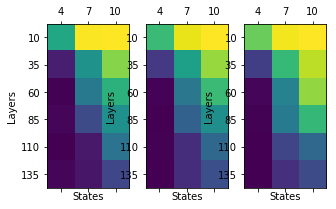

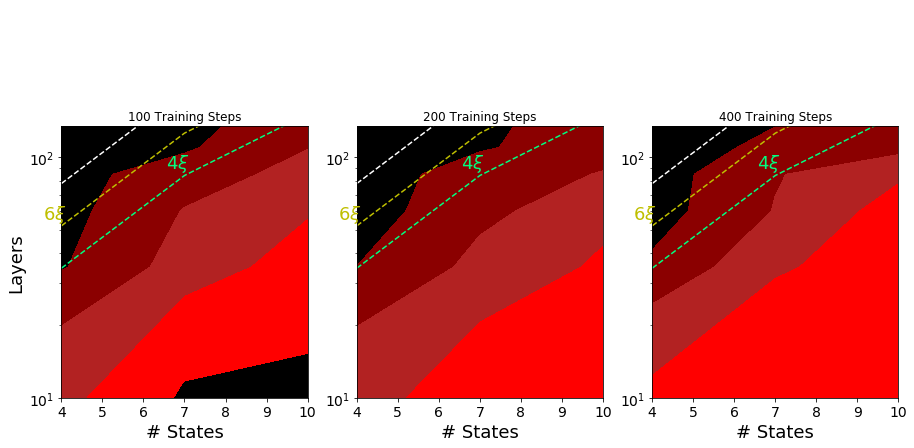

In [11]:
import matplotlib.pyplot as plt

results={}
if (1):
    ##aggregate the distributed results to a single objects
    name = "example_states"
    for i in range(4): ## 4 - maximum number of GPUs supported.
        try:
            results.update(src.mnist.load_obj("%s_%d"% (name,i)))
        except:
            continue
    src.mnist.save_obj(results,name)

if (1):
    fig = plt.figure()
    src.mnist.showgrid(name=name,steps=100,test=1, fig = fig , subplot=131)
    src.mnist.showgrid(name=name,steps=200,test=1, fig = fig , subplot=132)
    src.mnist.showgrid(name=name,steps=400,test=1, fig = fig , subplot=133)
    plt.show()

if (1):
    fig = plt.figure()
    src.mnist.showContour(name=name,steps=100,test=1, fig = fig , subplot=131, levels=3)
    src.mnist.showContour(name=name,steps=200,test=1, fig = fig , subplot=132, levels=3)
    src.mnist.showContour(name=name,steps=400,test=1, fig = fig , subplot=133, levels=3)
    plt.gcf().set_size_inches(15, 5)

    plt.show()

